# Playground

This notebook is designed to explore the functionalities of `eos694w`. Ensure you have everything set up before you proceed.


### Prerequiste

To execute this notebook on your local machine, make sure you have the following installed:

1. Python 3.10 or higher
2. Git
3. [Optional] Tools for managing environments (we’re using conda in this case)
   
### Step 1: Create a virtual environment

You’re free to use any tool for environment management. In this case, we’re using `conda`. To create an environment, execute the following command:


```bash
conda env create -f env.yml
```

You’ll find a file named env.yml in the root directory. This file contains all the necessary dependencies required for this project.

### Step 2: Activate

Now that we have created our virtual environment, we can activate it using the following command.

```bash
conda activate eos694w
```

> Note the above command will only work if you have used `conda` to create your virtual environment



In [10]:
import os
import rdkit
import csv
import matplotlib.pyplot as plt

try: ipynb_path
except NameError: ipynb_path = os.getcwd()

root = os.path.abspath(os.path.join(ipynb_path, '..'))
notebook = os.path.join(root, 'notebook')


# Input smiles path
input_smiles = os.path.join(notebook, 'input', 'smiles.smi')
output_smiles = os.path.join(notebook, 'output', 'out_smiles.csv')

In [11]:
# Running the model to generate new smiles simliar to the provided smiles.

!python {root}/model/framework/code/main.py {input_smiles} {output_smiles}

Start 1708791279.2514307
End 1708791464.7231383
Total Time 185.47170758247375


D:\projects\github\ersilia\eos694w\model\checkpoints\prior\mol2mol_similarity.prior does not contain metadata
randomize_smiles set to false for Mol2Mol


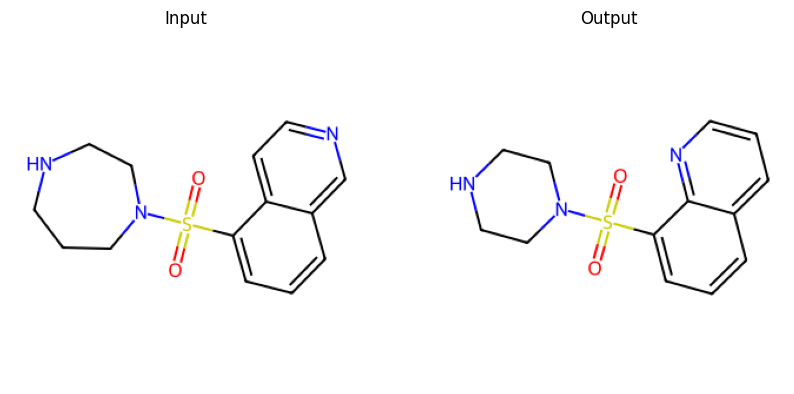

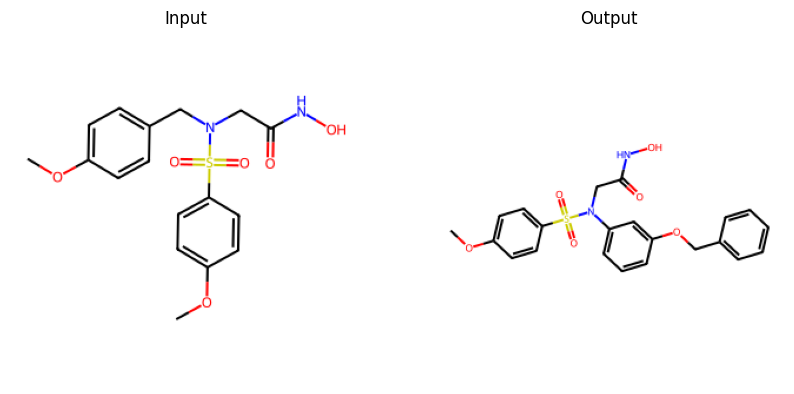

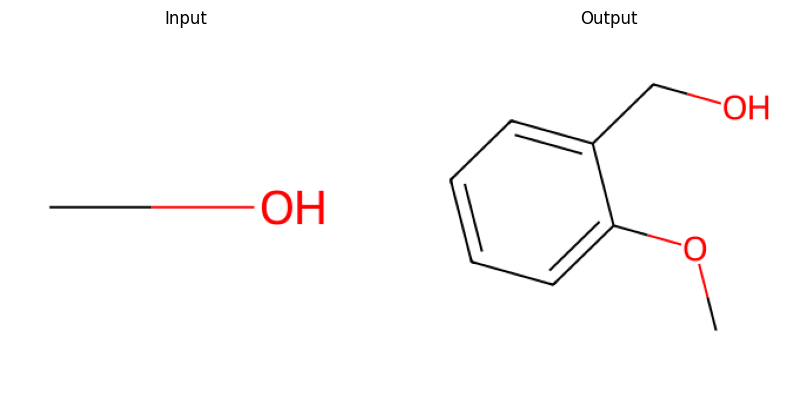

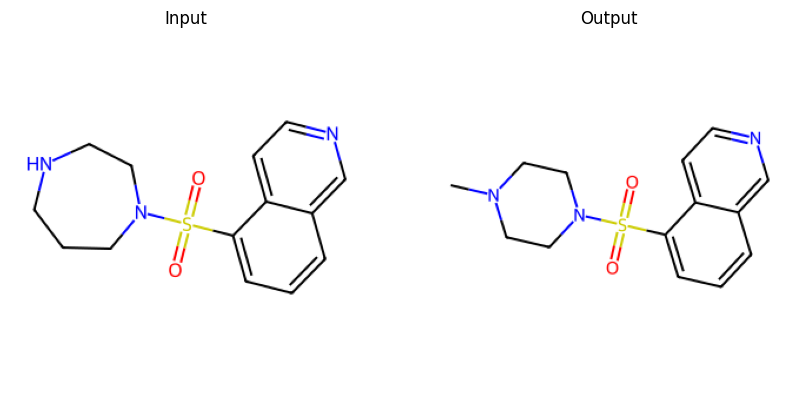

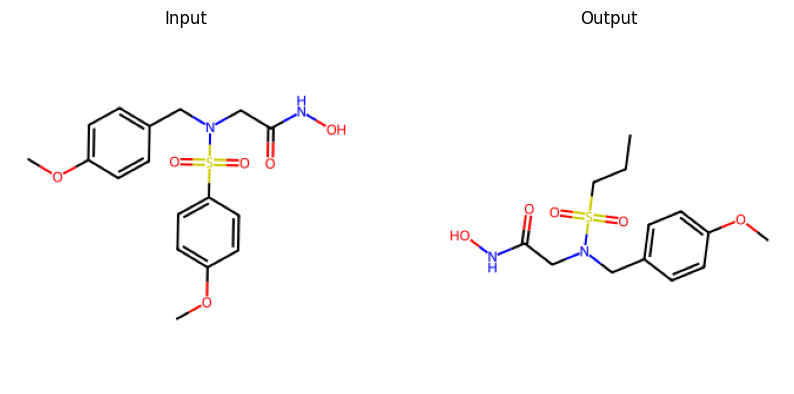

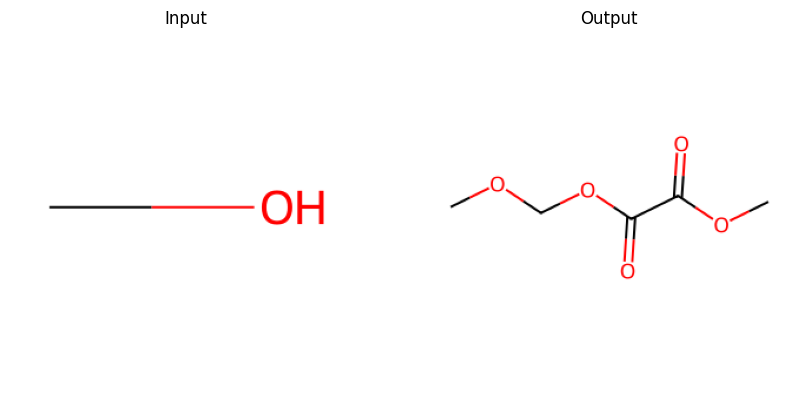

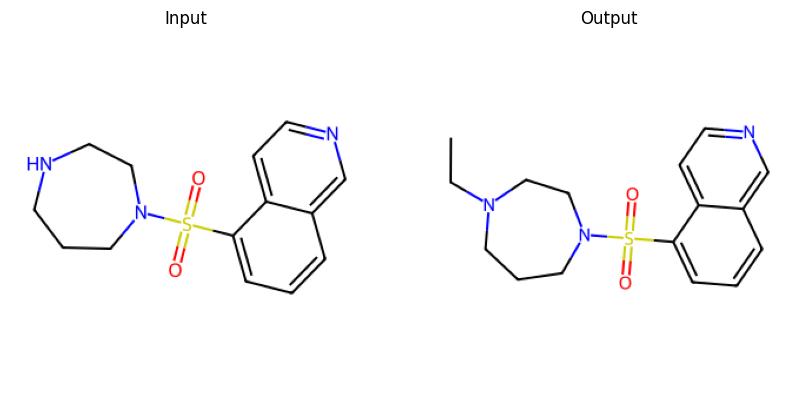

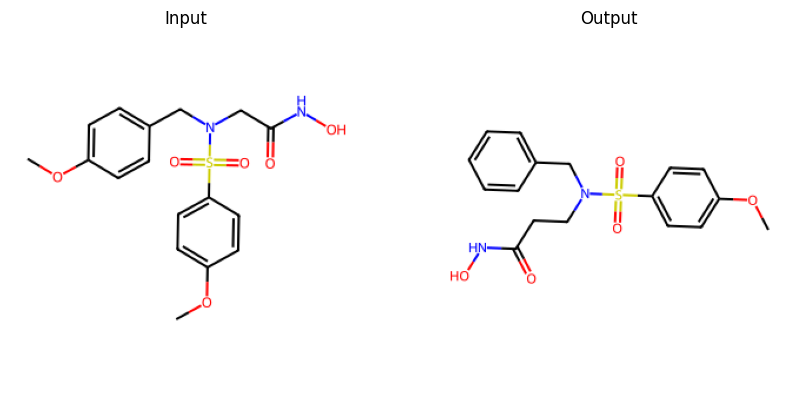

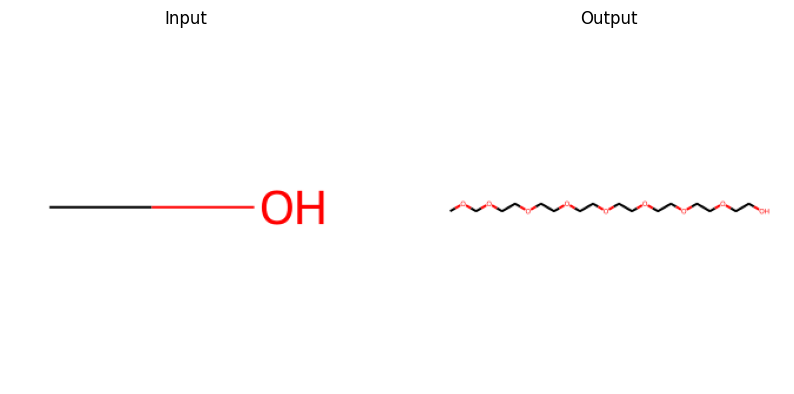

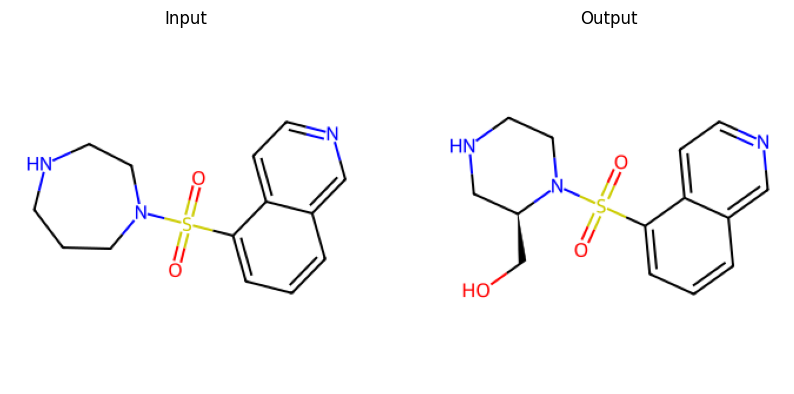

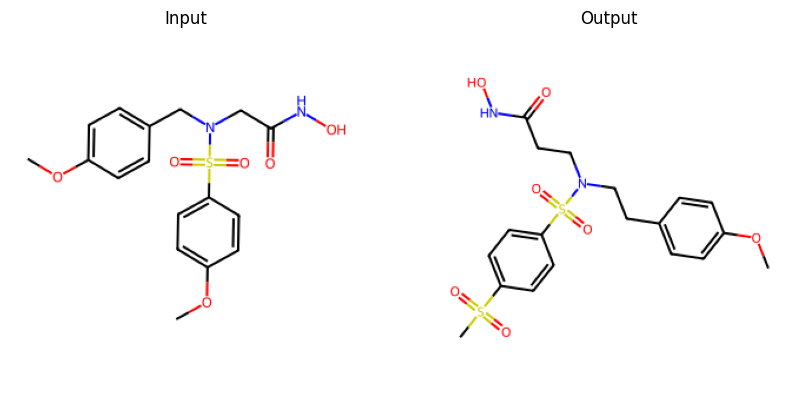

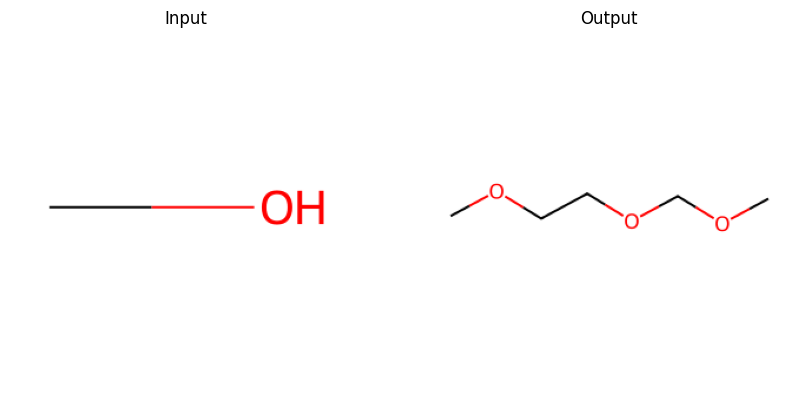

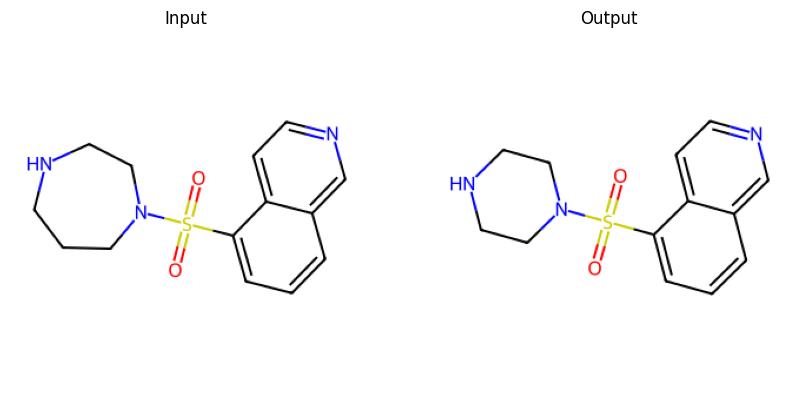

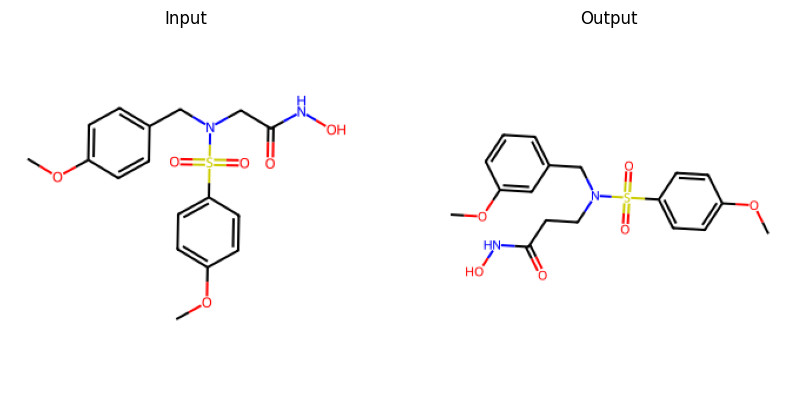

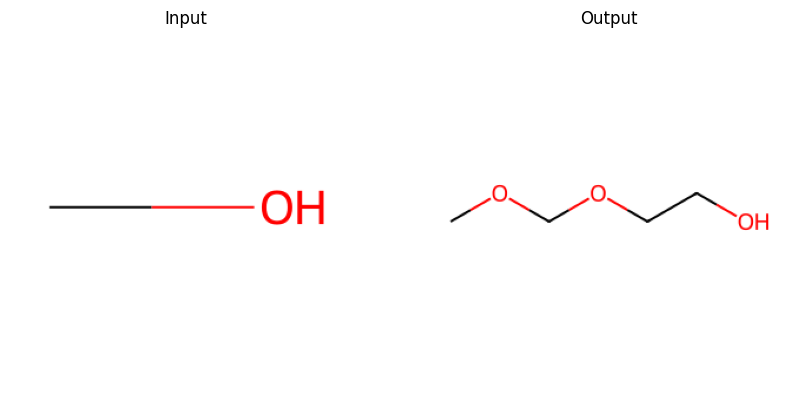

In [8]:
def molecule_from_smiles_img(smile):
    return rdkit.Chem.Draw.MolToImage(rdkit.Chem.MolFromSmiles(smile))


# Visualize some of the output molecules.
with open(output_smiles, newline='') as csvfile:
    reader = csv.reader(csvfile)
    count = 0
    visited_input_smiles = {}
    for row in reader:
        if count == 0:
            # Header
            count += 1
            continue

        current_input_smile = row[1]

        if(current_input_smile in visited_input_smiles):
            if visited_input_smiles[current_input_smile] > 4:
                continue
            else:
                visited_input_smiles[current_input_smile] += 1
        else:
            visited_input_smiles[current_input_smile] = 1
        
        count += 1
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a subplot with 1 row and 2 columns
        
        # Draw the input molecule
        axs[0].imshow(molecule_from_smiles_img(row[1]))
        axs[0].set_title('Input')
        axs[0].axis('off')  # Hide axes
        
        # Draw the output molecule
        axs[1].imshow(molecule_from_smiles_img(row[0]))
        axs[1].set_title('Output')
        axs[1].axis('off')  # Hide axes

        plt.savefig(os.path.join(output_smiles, '..', row[0]), dpi=300, bbox_inches='tight')

        plt.show()


In [ ]:
# Check how many unique molecules generated.

